In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv("C:\\Users\\jtang\\AI4ALL\\linkedin-AI4ALL-project\\postings.csv")
# Dropping Missing Values
df = df.dropna(subset=['description']).reset_index(drop=True)
df = df.dropna(subset=['currency']).reset_index(drop=True)
df = df.dropna(subset=['compensation_type']).reset_index(drop=True)

# Only consider USD
df = df[df['currency'] == 'USD'].reset_index(drop=True)

# Get unique values in 'currency' and 'compensation_type' columns
unique_currency = df['currency'].unique()
unique_compensation_type = df['compensation_type'].unique()

# Print the unique values
print("Unique currencies:", unique_currency)
print("Unique compensation types:", unique_compensation_type)


Unique currencies: ['USD']
Unique compensation types: ['BASE_SALARY']


# EDA

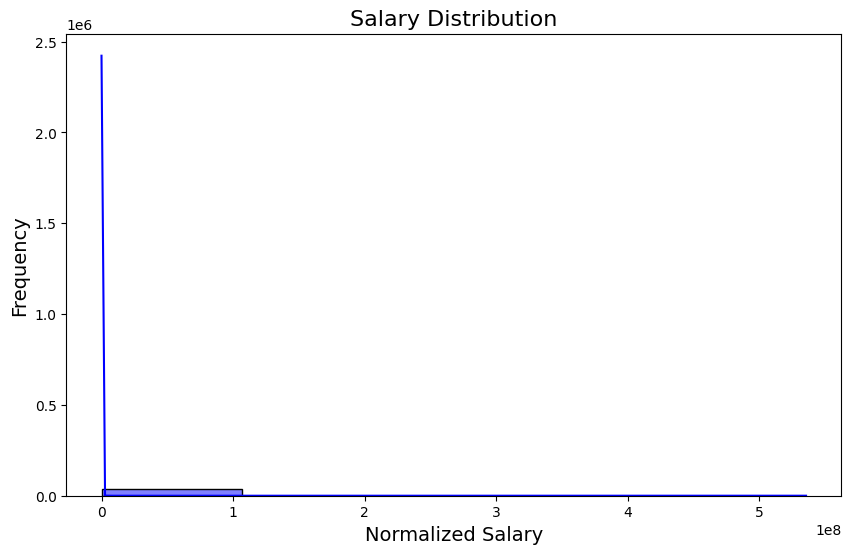

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm New ...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"Aspen Therapy Wellness , committed serving cli...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,National Exemplar accepting applications Assis...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking HVAC service tech experience commerica...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36052,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
36053,3906266165,Athena Recruiting,Catering Event Manager,role handles onsite catering event planning ev...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
36054,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer (Complaint Investig...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
36055,3906267117,Lozano Smith,Title IX/Investigations Attorney,Walnut Creek office currently seeking attorney...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


In [8]:
plt.figure(figsize=(10, 6))
# Use seaborn to create a histogram
sns.histplot(df['normalized_salary'], bins=5, kde=True, color='blue')
    
# Add titles and labels
plt.title('Salary Distribution', fontsize=16)
plt.xlabel('Normalized Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
    
# Show the plot
plt.show()
df


In [30]:
Q1 = df['normalized_salary'].quantile(0.25)
Q3 = df['normalized_salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only non-outliers
df_no_outliers = df[(df['normalized_salary'] >= lower_bound) & (df['normalized_salary'] <= upper_bound)]

print(f"Original size: {df.shape[0]} rows")
print(f"Size after removing outliers: {df_no_outliers.shape[0]} rows")

Original size: 36057 rows
Size after removing outliers: 35105 rows


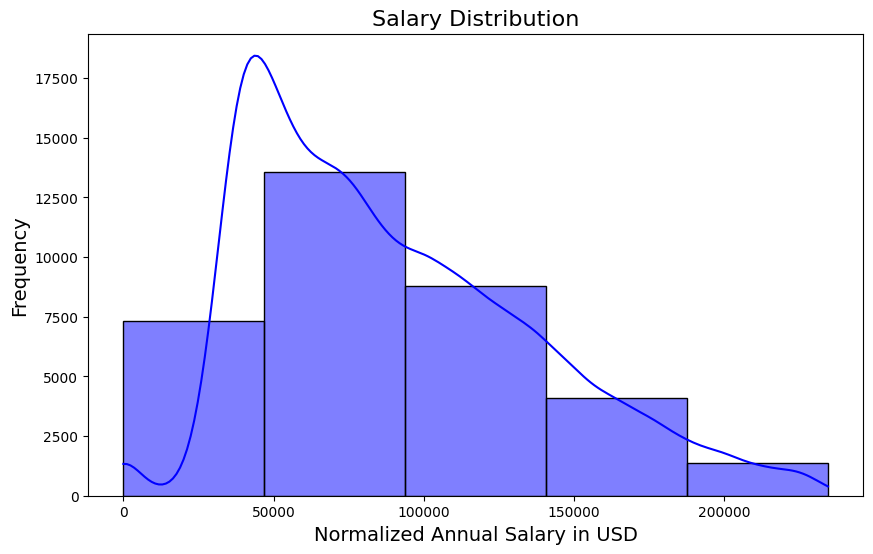

In [31]:
plt.figure(figsize=(10, 6))
# Use seaborn to create a histogram
sns.histplot(df_no_outliers['normalized_salary'], bins=5, kde=True, color='blue')
    
# Add titles and labels
plt.title('Salary Distribution', fontsize=16)
plt.xlabel('Normalized Annual Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
    
# Show the plot
plt.show()

In [43]:

# Import necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jtang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jtang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jtang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
df_no_outliers.loc[:, 'description'] = df_no_outliers['description'].fillna('')  # Handle missing data
df_no_outliers.loc[:, 'description'] = df_no_outliers['description'].astype(str)  # Ensure the column is of type string

# Feature Engineering

In [52]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords & lemmatize
    return ' '.join(tokens)

# Apply preprocessing to the description column efficiently
df_no_outliers.loc[:, 'description'] = df_no_outliers['description'].apply(preprocess_text)

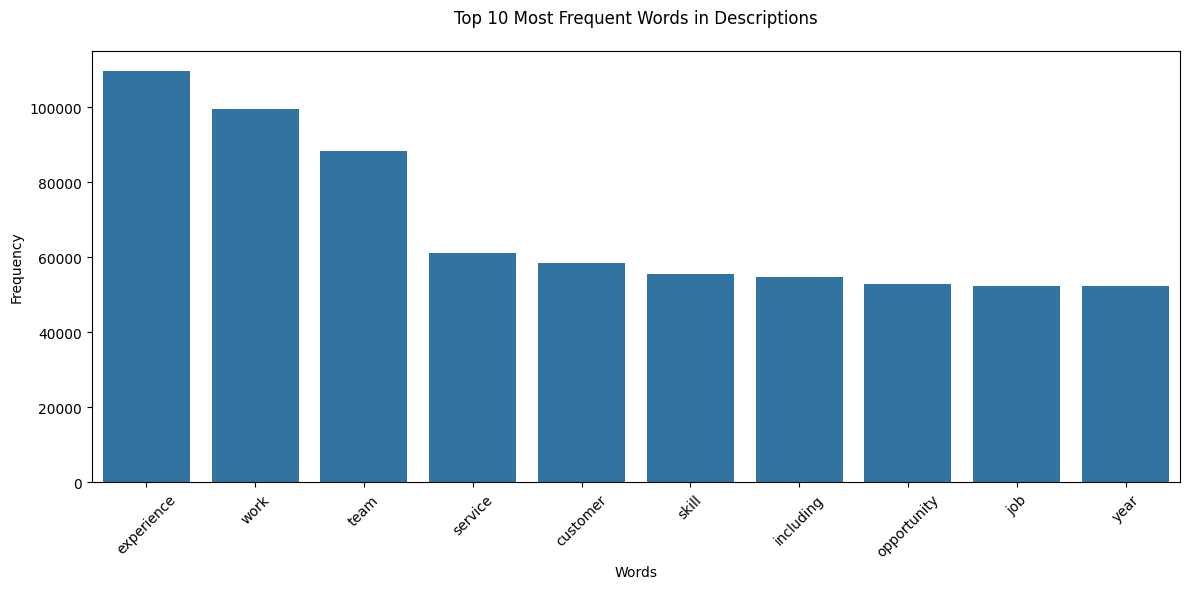


Word Frequencies:
experience: 109540
work: 99597
team: 88317
service: 61262
customer: 58540
skill: 55457
including: 54827
opportunity: 52968
job: 52451
year: 52392


In [58]:
from collections import Counter
# Split all descriptions into words and count frequencies
all_words = ' '.join(df_no_outliers['description']).split()
word_freq = Counter(all_words)

# Get the top 10 most frequent words
top_10_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_words.keys()), y=list(top_10_words.values()))

# Customize the plot
plt.title('Top 10 Most Frequent Words in Descriptions', pad=20)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Print the actual frequencies
print("\nWord Frequencies:")
for word, freq in top_10_words.items():
    print(f"{word}: {freq}")

In [ ]:
# sort noramlized_salary into three buckets: low, median, high
def categorize_salary(salary):
    if salary <= 50000:
        return 'low'
    elif salary <= 150000:
        return 'median'
    else:
        return 'high'

df_no_outliers.loc[:,'salary_bracket'] = df_no_outliers['normalized_salary'].apply(categorize_salary)
# Verify the distribution
print("\nSalary Bracket Distribution:")
print(df_no_outliers['salary_bracket'].value_counts())


Salary Bracket Distribution:
salary_bracket
median    22261
low        8580
high       4264
Name: count, dtype: int64


# Model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Split the data
X = df_no_outliers['description']
y = df_no_outliers['salary_bracket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with Random Forest
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Get feature importance
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()
importances = pipeline.named_steps['classifier'].feature_importances_

# Get top important features overall
n_top_features = 20
top_indices = np.argsort(importances)[-n_top_features:]
top_features = [(feature_names[i], importances[i]) for i in top_indices]

print(f"\nTop {n_top_features} most important words for salary prediction:")
for feature, importance in reversed(top_features):
    print(f"{feature}: {importance:.4f}")

# Print sample predictions with probabilities
print("\nSample Predictions with Probabilities:")
probabilities = pipeline.predict_proba(X_test[:5])
for text, true_label, pred_label, probs in zip(X_test[:5], y_test[:5], y_pred[:5], probabilities):
    print(f"\nText snippet: {text[:100]}...")
    print(f"True label: {true_label}")
    print(f"Predicted label: {pred_label}")
    print("Class probabilities:")
    for class_label, prob in zip(pipeline.named_steps['classifier'].classes_, probs):
        print(f"  {class_label}: {prob:.4f}")

Classification Report:
              precision    recall  f1-score   support

        high       0.91      0.22      0.36       835
         low       0.88      0.64      0.74      1662
      median       0.78      0.96      0.86      4524

    accuracy                           0.80      7021
   macro avg       0.86      0.61      0.65      7021
weighted avg       0.82      0.80      0.77      7021


Confusion Matrix:
[[ 186    5  644]
 [   0 1062  600]
 [  18  144 4362]]

Top 20 most important words for salary prediction:
school diploma: 0.0070
degree: 0.0066
year: 0.0061
customer service: 0.0053
diploma: 0.0052
school: 0.0048
high school: 0.0046
hour: 0.0044
store: 0.0036
per hour: 0.0032
project: 0.0029
clean: 0.0029
hourly: 0.0028
ged: 0.0028
customer: 0.0028
bachelor: 0.0027
10 year: 0.0027
experience: 0.0024
business: 0.0024
design: 0.0024

Sample Predictions with Probabilities:

Text snippet: life capgeminicapgemini support aspect wellbeing throughout changing stage life career

In [64]:
from sklearn.tree import export_graphviz
import graphviz

# Get a single tree from the random forest
tree = pipeline.named_steps['classifier'].estimators_[0]

# Get feature names from TF-IDF
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

# Export the tree to dot format
dot_data = export_graphviz(
    tree,
    feature_names=feature_names, 
    class_names=list(pipeline.named_steps['classifier'].classes_),
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3  # Limit depth to make visualization manageable
)

# Create graph
graph = graphviz.Source(dot_data)

# Display the tree
graph.render("decision_tree_visualization", format="png", cleanup=True)

print("Decision tree has been saved as 'decision_tree_visualization.png'")

# If you want to see a text representation of the tree rules
from sklearn.tree import export_text

# Print text representation
print("\nText representation of the decision tree:")
print(export_text(tree, feature_names=list(feature_names), max_depth=3))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH